# SPRINT 1

In [1]:
import numpy as np
import pandas as pd

In [2]:
# merging all the datasets into one
events = pd.read_excel("C:\\Users\\samai\\OneDrive\\Desktop\\NIIT\\10 capstone\\capstone files\\game_events.xlsx")
lineup = pd.read_excel("C:\\Users\\samai\\OneDrive\\Desktop\\NIIT\\10 capstone\\capstone files\\game_lineups.xlsx")
games = pd.read_excel("C:\\Users\\samai\\OneDrive\\Desktop\\NIIT\\10 capstone\\capstone files\\games.xlsx")
players = pd.read_excel("C:\\Users\\samai\\OneDrive\\Desktop\\NIIT\\10 capstone\\capstone files\\players.xlsx")
appearances = pd.read_excel("C:\\Users\\samai\\OneDrive\\Desktop\\NIIT\\10 capstone\\capstone files\\appearances.xlsx")

In [3]:
df1 = pd.merge(games, events, on="game_id", how="inner")
df2 = pd.merge(df1, players, on="player_id", how="inner")
df3 = pd.merge(df2, appearances , on="game_id", how="inner")
df4 = pd.merge(df3, lineup, on="game_id", how="left")

In [4]:
df4.isnull().sum()  # to check the number of null values

game_id                           0
competition_id_x                  0
season                            0
round                             0
date_x                            0
home_club_goals                   0
away_club_goals                   0
home_club_position              217
away_club_position              217
home_club_manager_name            4
away_club_manager_name            4
stadium                           0
attendance                       59
referee                           4
home_club_formation            1339
away_club_formation            1339
home_club_name                   58
away_club_name                   19
aggregate                         0
competition_type                  0
game_event_id                     0
date_y                            0
minute                            0
type_x                            0
player_id_x                       0
description                     538
player_in_id                    597
player_assist_id            

In [5]:
df4.shape

(1339, 59)

### Some of the columns have just null values in them so we will remove those columns

In [6]:
# columns with just null values
null_columns = df4.columns[df4.isnull().all()]
print("Columns with all null values:", null_columns.tolist())


Columns with all null values: ['home_club_formation', 'away_club_formation', 'game_lineups_id', 'type_y', 'number', 'player_id', 'player_name_y', 'team_captain', 'position_y']


In [7]:
df4 = df4.drop(columns=null_columns)

### Imputing for columns - player_in_assist, player_assist_id,agent_name, description and contract_expiration_date

In [8]:
columns_to_impute = ['player_assist_id', 'player_in_id', 'agent_name','contract_expiration_date','description']
df4[columns_to_impute] = df4[columns_to_impute].fillna('Unknown')

### Imputing mode or mean for the other columns

In [9]:
for col in df4.columns:
    if df4[col].dtype == 'object':  # Categorical columns
        df4[col] = df4[col].fillna(df4[col].mode()[0])
    elif df4[col].dtype in ['int64', 'float64']:  # Numeric columns
        df4[col] = df4[col].fillna(df4[col].mean()) 


In [10]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   game_id                      1339 non-null   int64         
 1   competition_id_x             1339 non-null   object        
 2   season                       1339 non-null   int64         
 3   round                        1339 non-null   object        
 4   date_x                       1339 non-null   datetime64[ns]
 5   home_club_goals              1339 non-null   int64         
 6   away_club_goals              1339 non-null   int64         
 7   home_club_position           1339 non-null   float64       
 8   away_club_position           1339 non-null   float64       
 9   home_club_manager_name       1339 non-null   object        
 10  away_club_manager_name       1339 non-null   object        
 11  stadium                      1339 non-null 

In [11]:
df4.isnull().sum()

game_id                        0
competition_id_x               0
season                         0
round                          0
date_x                         0
home_club_goals                0
away_club_goals                0
home_club_position             0
away_club_position             0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
home_club_name                 0
away_club_name                 0
aggregate                      0
competition_type               0
game_event_id                  0
date_y                         0
minute                         0
type_x                         0
player_id_x                    0
description                    0
player_in_id                   0
player_assist_id               0
name                           0
last_season                    0
current_club_id                0
player_code                    0
country_of

In [12]:
df4.duplicated().sum() # there are no duplicates

0

In [13]:
df4.to_excel("Football_Data_Merged_Cleaned.xlsx", index=False)

In [14]:
'''competition id y ( for appearances)
competition id x (for games)
date x (for games)
date y ( for events)
date ( for appearances)
type x ( events, games )
player id x ( for events, players)
player id y ( for apperances)
position x ( for players)
player name x ( for appearnces)
name ( for players)'''

'competition id y ( for appearances)\ncompetition id x (for games)\ndate x (for games)\ndate y ( for events)\ndate ( for appearances)\ntype x ( events, games )\nplayer id x ( for events, players)\nplayer id y ( for apperances)\nposition x ( for players)\nplayer name x ( for appearnces)\nname ( for players)'

# SPRINT 3

#### PERFORMANCE ANALYSIS

In [15]:
# opening the merged dataset again
df = pd.read_excel("C:\\Users\\samai\\OneDrive\\Desktop\\NIIT\\10 capstone\\Football_Data_Merged_Cleaned.xlsx")

In [16]:
df.head()

,game_id,competition_id_x,season,round,date_x,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,...,appearance_id,player_id_y,date,player_name_x,competition_id_y,yellow_cards,red_cards,goals,assists,minutes_played
0,2224732,DK1,2012,1. Matchday,2012-07-14,6,1,1.0,12.0,Lars Sondergaard,...,2224732_161244,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,90
1,2225471,GB1,2012,4. Matchday,2012-09-15,2,0,14.0,5.0,Paul Lambert,...,2225471_39471,39471,2012-09-15,Brad Guzan,GB1,0,0,0,0,90
2,2225471,GB1,2012,4. Matchday,2012-09-15,2,0,14.0,5.0,Paul Lambert,...,2225471_61575,61575,2012-09-15,Eric Lichaj,GB1,1,0,0,0,90
3,2231479,L1,2012,12. Matchday,2012-11-17,1,1,15.0,1.0,Dieter Hecking,...,2231479_49723,49723,2012-11-17,Timothy Chandler,L1,1,0,0,0,90
4,2231518,L1,2012,17. Matchday,2012-12-16,1,1,12.0,14.0,Thomas Schaaf,...,2231518_49723,49723,2012-12-16,Timothy Chandler,L1,1,0,0,0,90


### 1. Who were the top players with the most assists during the season?

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

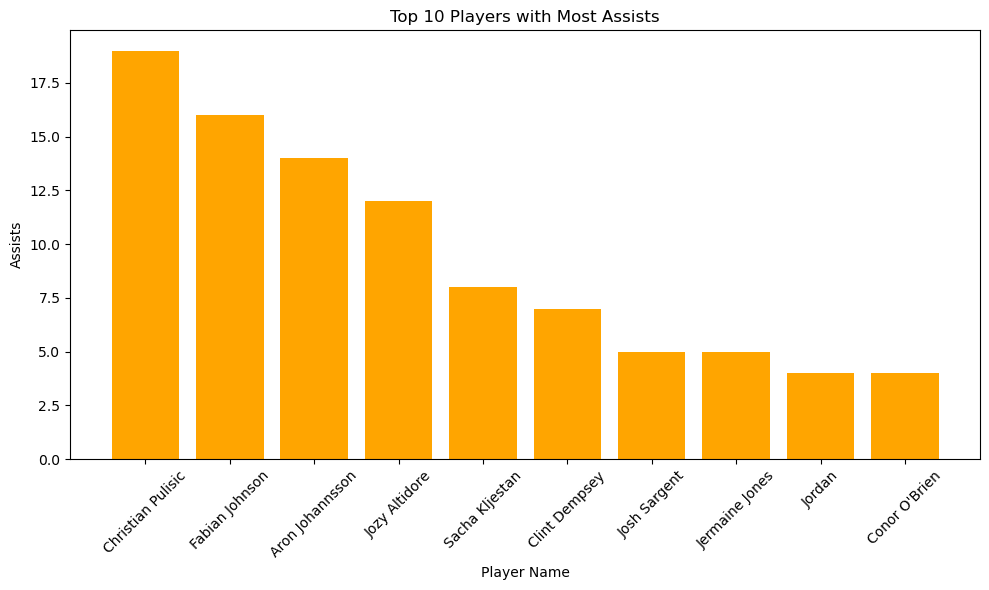

In [18]:
# Group by player
assists_per_player = df.groupby('player_name_x')['assists'].sum().reset_index()

# to get the top 10 player with most assists
top_assists = assists_per_player.sort_values(by='assists', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_assists['player_name_x'], top_assists['assists'], color='orange')
plt.title("Top 10 Players with Most Assists")
plt.xlabel("Player Name")
plt.ylabel("Assists")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 2) What is the average number of goals scored per player across all matches?

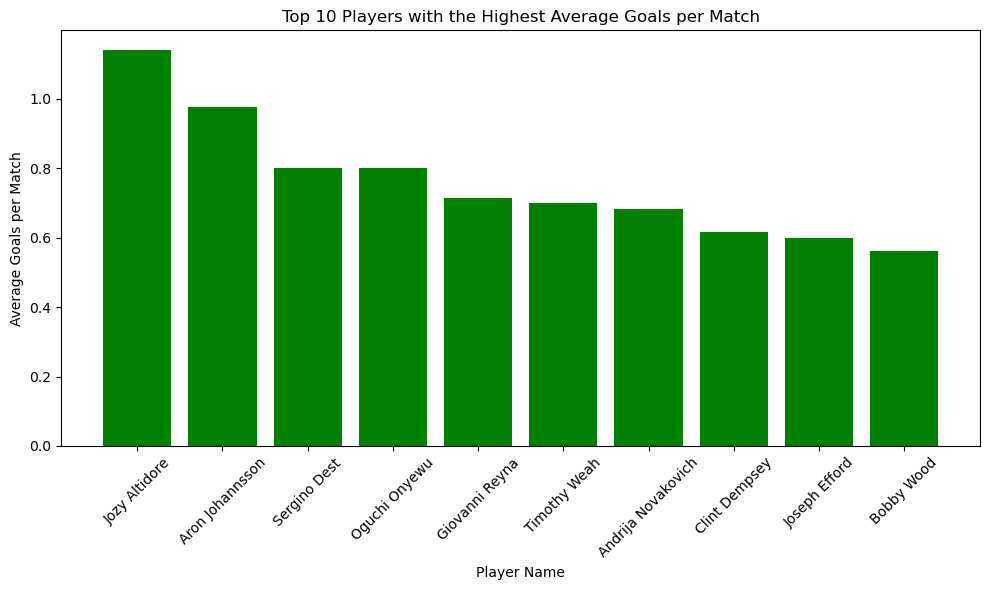

In [19]:
# Calculate average number of goals per player
avg_goals_per_player = df.groupby('player_name_x')['goals'].mean().reset_index()

# to get the top 10
top_avg_goals = avg_goals_per_player.sort_values(by='goals', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_avg_goals['player_name_x'], top_avg_goals['goals'], color='green')
plt.title("Top 10 Players with the Highest Average Goals per Match")
plt.xlabel("Player Name")
plt.ylabel("Average Goals per Match")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3 ) What is the probability that a player who scored a goal in a season also received atleast one yellow card?

In [20]:
# Filter players with atleast one goal
players_with_goals = df[df['goals'] > 0]

# Filter players with atleast one yellow card
players_with_yellow_cards = players_with_goals[players_with_goals['yellow_cards'] > 0]

# Calculate the conditional probability
conditional_probability = len(players_with_yellow_cards) / len(players_with_goals)

print(f"Conditional Probability (scored a goal received a yellow card): {conditional_probability:.4f}")


Conditional Probability (scored a goal received a yellow card): 0.1429


Conditional Probability: We calculated the likelihood of an event happening given a condition, like how likely a player who scored a goal also received atleast one yellow card. The answer is 0.14. which is very less.

### 4) What is the probability that a match with a high attendance (more than 30,000) also had a player who scored atleast one goal?

In [21]:
# Filter matches with attendance > 30,000
high_attendance_matches = df[df['attendance'] > 30000]

# Find players who scored a goal
players_with_more_than_0_goals = high_attendance_matches[high_attendance_matches['goals'] >0]

# Calculate the joint probability
joint_probability = len(players_with_more_than_0_goals) / len(high_attendance_matches)

print(f"Joint Probability (match attendance > 30,000 and player scored  atleast one goal): {joint_probability:.3f}")


Joint Probability (match attendance > 30,000 and player scored  atleast one goal): 0.275


Joint Probability: We calculated the likelihood of two events happening together, like the probability of a high-attendance match also having a player who scored atleast one goal. The answer is 0.275 which is again very low.

### 5) What is the probability distribution of the average number of goals scored per match across a random sample of 50 matches?

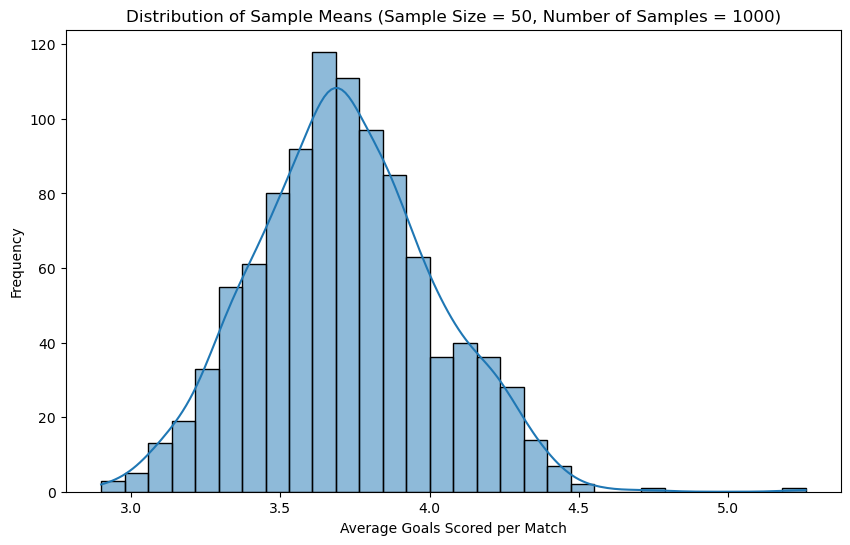

In [22]:
num_samples = 1000
sample_size = 50   
sample_averages = []

# Perform data sampling and calculate average goals for each sample
for _ in range(num_samples):
    sample = df.sample(n=sample_size)
    avg_goals = sample[['home_club_goals', 'away_club_goals','goals']].sum(axis=1).mean()
    sample_averages.append(avg_goals)

# Plot the distribution of sample averages
plt.figure(figsize = (10,6))
sns.histplot(sample_averages, bins=30, edgecolor='black', kde = True)
plt.title("Distribution of Sample Means (Sample Size = 50, Number of Samples = 1000)")
plt.xlabel("Average Goals Scored per Match")
plt.ylabel("Frequency")
plt.show()


Data Sampling and Central Limit Theorem: We drew multiple random samples of 50 matches and calculated the average goals per match, forming a sampling distribution. According to the central limit theorem, this distribution should resemble a normal distribution.

# SPRINT 4

In [23]:
backup = df.copy()

#### PERFORMANCE ANALYSIS

### 1) Can we predict the outcome of a match based on the positions of the home and away teams?

In [24]:
from sklearn import preprocessing
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str)
    
lb = preprocessing.LabelEncoder()
# Apply Label Encoding to all categorical columns
for col in df.select_dtypes(include=['object']).columns:  
    df[col] = lb.fit_transform(df[col])

In [25]:
# Identify datetime columns
datetime_cols = df.select_dtypes(include=['datetime']).columns

# Drop datetime columns
df_numeric = df.drop(columns=datetime_cols)

# Apply StandardScaler to the numeric columns
ss = preprocessing.StandardScaler()
new_df = pd.DataFrame(ss.fit_transform(df_numeric), columns=df_numeric.columns)

# concatenate the columns
new_df[datetime_cols] = df[datetime_cols]


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
new_df['home_win'] = (new_df['home_club_goals'] > new_df['away_club_goals']).astype(int)
df['home_win'] = (df['home_club_goals'] > df['away_club_goals']).astype(int)


X1 = new_df[['home_club_position','away_club_position']]
y1 = new_df['home_win']  # Target variable (home win)

# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Logistic Regression Model
log_reg1 = LogisticRegression()
log_reg1.fit(X_train1, y_train1)

# Predict on the test data
y_pred1 = log_reg1.predict(X_test1)

# Evaluate the model
accuracy1 = accuracy_score(y_test1, y_pred1)
conf_matrix1 = confusion_matrix(y_test1, y_pred1)
print(f"Business Question 1 - Accuracy: {accuracy1}")
print(f"Confusion Matrix:\n{conf_matrix1}")
print(classification_report(y_test1, y_pred1))


Business Question 1 - Accuracy: 0.654228855721393
Confusion Matrix:
[[169  53]
 [ 86  94]]
              precision    recall  f1-score   support

           0       0.66      0.76      0.71       222
           1       0.64      0.52      0.57       180

    accuracy                           0.65       402
   macro avg       0.65      0.64      0.64       402
weighted avg       0.65      0.65      0.65       402



Accuracy - The model correctly predicts the outcome (whether the home team wins) 65.42% of the time. While this is reasonable, there is still room for improvement, especially if predicting home wins is a critical task.  

Confusion Matrix:  
True Positives (TP) = 94 (Home win predicted correctly as home win)  
False Positives (FP) = 53 (Non-home win predicted as home win)  
True Negatives (TN) = 169 (Non-home win predicted correctly as non-home win)  
False Negatives (FN) = 86 (Home win predicted as non-home win)  
  
Precision for Home Win (1) = 0.64   
Of the times the model predicted a home win, 64% of those predictions were correct.

Precision for Non-Home Win (0) = 0.66  
Of the times the model predicted a non-home win, 66% were correct.

Recall for Home Win (1) = 0.52   
The model correctly identified 52% of actual home wins. The model is missing around 48% of home wins (false negatives). This indicates that the model may be biased toward predicting more non-home wins than home wins.

Recall for Non-Home Win (0) = 0.76   
The model successfully identified 76% of non-home wins. It seems to perform better at predicting non-home wins compared to home wins, as indicated by the higher recall value.

### 2) Is there a relationship between the number of goals scored by a player and the number of assists they provide?

In [28]:
# Create a binary target variable: 1 if goals > 0 and assists > 0, else 0
new_df['goals_assists'] = ((new_df['goals'] > 0) & (new_df['assists'] > 0)).astype(int)
df['goals_assists'] = ((df['goals'] > 0) & (df['assists'] > 0)).astype(int)

# Features and target
X = new_df[['goals', 'assists', 'minutes_played']]
y = df['goals_assists']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report
print(f"Business Question 1 - Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(class_report)


Business Question 1 - Accuracy: 0.996268656716418
Confusion Matrix:
[[255   1]
 [  0  12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       256
           1       0.92      1.00      0.96        12

    accuracy                           1.00       268
   macro avg       0.96      1.00      0.98       268
weighted avg       1.00      1.00      1.00       268



With an accuracy of 99.63%, the model is performing exceptionally well.  

Confusion Matrix:
True Positives (TP): 12 (the model correctly predicted that these players have both goals and assists).  
False Positives (FP): 1 (the model incorrectly predicted that this player had both goals and assists when they didn't).  
True Negatives (TN): 255 (the model correctly predicted that these players did not have both goals and assists).  
False Negatives (FN): 0 (the model did not miss any players who had both goals and assists).  

Precision, Recall, and F1-Score:  
Class 0 (no goals and assists):  
Precision: 1.00 (100% of the time, when the model predicts no goals and assists, it is correct).  
Recall: 1.00 (100% of the players who don't have both goals and assists were identified correctly).  
F1-Score: 1.00 (The precision and recall balance perfectly, indicating a perfect performance for this class).  

Class 1 (goals and assists > 0):  
Precision: 0.92 (Out of all the times the model predicted both goals and assists, 92% of them were correct).  
Recall: 1.00 (The model correctly identified all instances of players with both goals and assists).  
F1-Score: 0.96 (The balance of precision and recall for Class 1 is still very good).  

### PLAYER PROFILE AND MARKET VALUE

### 1) What is the average market value of players by position?

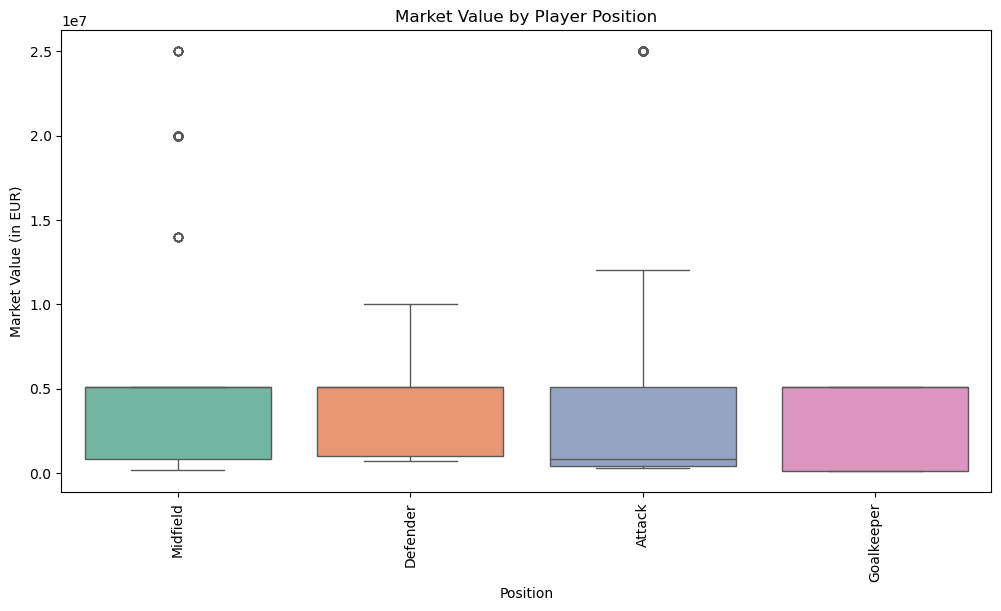

In [29]:
# Boxplot to show market value distribution by position
plt.figure(figsize=(12, 6))
sns.boxplot(x='position_x', y='market_value_in_eur', data= backup, palette="Set2", hue = 'position_x' )
plt.title('Market Value by Player Position')
plt.xlabel('Position')
plt.ylabel('Market Value (in EUR)')
plt.xticks(rotation=90)
plt.show()


In [30]:
average_market_value = backup.groupby('position_x')['market_value_in_eur'].mean()
print(average_market_value)


position_x
Attack        5.227499e+06
Defender      3.330443e+06
Goalkeeper    3.522029e+06
Midfield      5.984853e+06
Name: market_value_in_eur, dtype: float64


Midfielders tend to have market values concentrated around 0.1- 0.5 EUR, with some high-value players skewing the distribution upwards.    
Defenders generally have lower market values compared to midfielders, with the majority below 0.5 EUR. However, some higher-value defenders exist, pushing the distribution slightly upward.  
Attackers have moderately high market values, with a few high-value outliers. Attackers tend to have a slightly higher market value on average compared to defenders, with many players concentrated between 0.5 - 1.3 EUR. High-value players are less common but present.     
 Goalkeepers have the lowest and most consistent market values among all positions, with most concentrated around 0.5 EUR or lower.

###  2) What is the average market value of players based on their birth country?

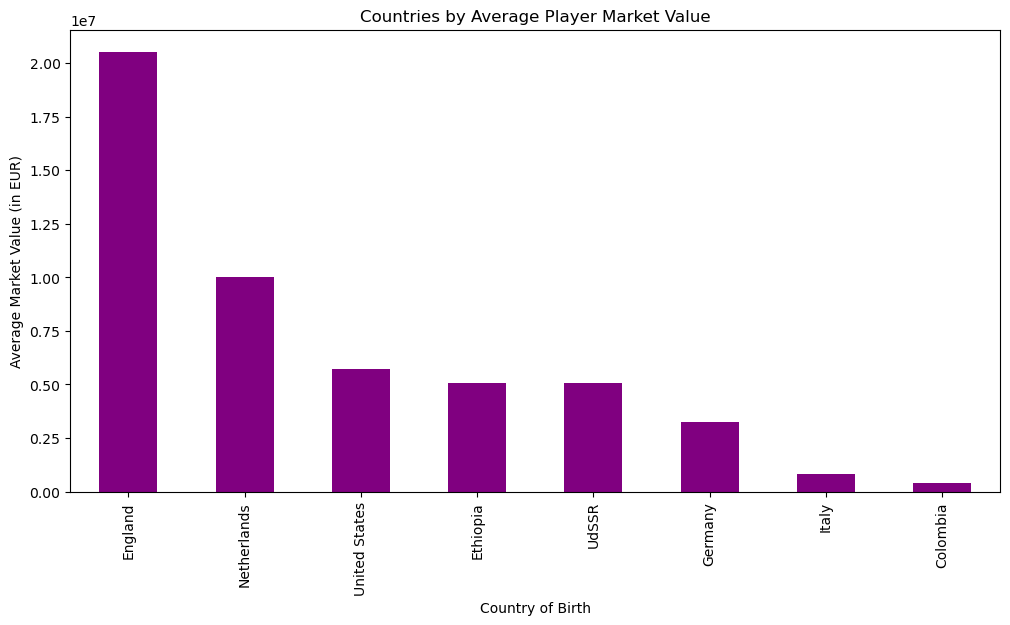

In [31]:
# Grouping by country of birth and calculating the average market value
avg_market_value_by_country = backup.groupby('country_of_birth')['market_value_in_eur'].mean().sort_values(ascending=False)

# Plotting the average market value by country
plt.figure(figsize=(12, 6))
avg_market_value_by_country.plot(kind='bar', color='purple')
plt.title('Countries by Average Player Market Value')
plt.xlabel('Country of Birth')
plt.ylabel('Average Market Value (in EUR)')
plt.xticks(rotation=90)
plt.show()


This analysis will help us understand how players' market values vary based on their country of birth. England is leading in average market value for the players in the country.

### 3) Is there a correlation between a player’s age and their market value?

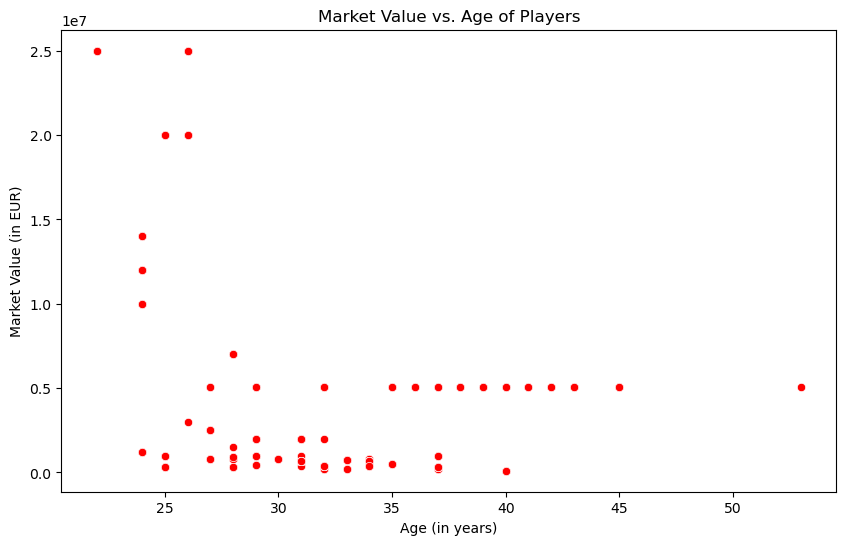

In [32]:
# Calculating age from the date of birth
backup['age'] = (pd.to_datetime('today') - pd.to_datetime(df['date_of_birth'])).dt.days // 365
new_df['age'] = (pd.to_datetime('today') - pd.to_datetime(df['date_of_birth'])).dt.days // 365
# Scatter plot to show the relationship between age and market value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='market_value_in_eur', data= backup, color='red')
plt.title('Market Value vs. Age of Players')
plt.xlabel('Age (in years)')
plt.ylabel('Market Value (in EUR)')
plt.show()


The scatter plot will reveal if there’s a correlation between age and market value. A negative correlation here suggests that older players have lower market values, while younger players might have higher values due to their future potential. 

# SPRINT 5

### PLAYER PROFILE AND MARKET VALUE 

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
new_df.corr()['market_value_in_eur'].sort_values(ascending = False)

market_value_in_eur            1.000000e+00
highest_market_value_in_eur    8.886686e-01
date_of_birth                  3.992680e-01
player_id_x                    3.877566e-01
last_season                    3.864302e-01
attendance                     3.581922e-01
date_x                         3.389549e-01
date_y                         3.389549e-01
date                           3.389549e-01
game_id                        3.325886e-01
season                         3.288993e-01
appearance_id                  3.088572e-01
player_id_y                    3.016788e-01
contract_expiration_date       2.866740e-01
agent_name                     2.836354e-01
stadium                        2.280561e-01
sub_position                   1.849610e-01
player_code                    1.466545e-01
name                           1.466545e-01
country_of_birth               1.209430e-01
player_assist_id               1.040460e-01
player_name_x                  1.025560e-01
assists                        9

### 1) How does the number of goals scored influence a player's market value?

In [35]:
# Selecting data
X = new_df[['goals']].dropna()
y = new_df['market_value_in_eur'].dropna()

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Model Evaluation
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Coefficients
print("Coefficient (Goals):", model.coef_[0])


R-squared: 0.0022194969050781665
Mean Squared Error: 0.9085565686683297
Coefficient (Goals): -0.04429459909872143


R-squared: 0.0022  
This means that only 0.22% of the variation in a player's market value can be explained by the number of goals scored.  
A very low R-squared indicates that the relationship between goals scored and market value is weak or nearly nonexistent in this dataset.  

Mean Squared Error (MSE): 0.9086  
This represents the average squared difference between the actual and predicted market values. A high MSE suggests poor model performance.  

Coefficient (Goals): -0.0443  
The negative coefficient indicates that, according to this model, scoring more goals slightly decreases the market value of a player. This result is   counterintuitive and suggests that "goals scored" might not be a strong predictor of market value or there could be confounding factors affecting this relationship.  

Based on the results, goals scored do not significantly influence market value in this dataset. Other variables, such as a player's age, position, or previous market value, may play a larger role in determining market value.  

### 2) How does the highest market value of a player impact their current market value?

In [36]:
X = new_df[['highest_market_value_in_eur']]
y = new_df['market_value_in_eur']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)
# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.20093590193429675
R-squared: 0.7793313787652294


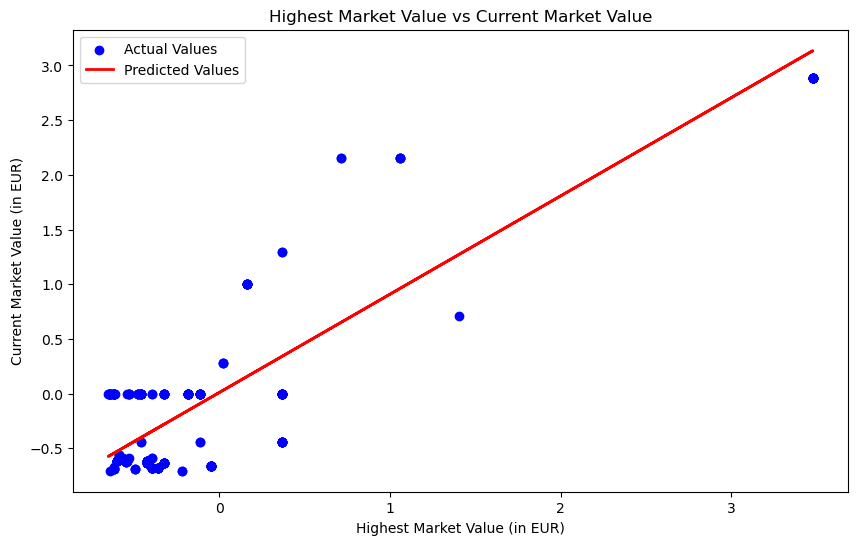

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Values')
plt.title('Highest Market Value vs Current Market Value')
plt.xlabel('Highest Market Value (in EUR)')
plt.ylabel('Current Market Value (in EUR)')
plt.legend()
plt.show()


R-squared: 0.7793  
This means that 77.93% of the variation in a player's current market value can be explained by their highest market value.
A high R-squared indicates a strong relationship between these two variables, which makes sense as past performance is often a strong indicator of current value.  

Mean Squared Error (MSE): 0.2009  
The low MSE indicates that the model predictions are relatively accurate.  

The highest market value of a player is a strong predictor of their current market value. This suggests that a player's market value tends to remain relatively consistent over time, and their peak value is a good benchmark for estimating their current worth.  

### Now for the Multiple Linear Regression

###  3) How do a player's highest market value and age influence their current market value?

In [38]:
# Selecting features
X = new_df[['highest_market_value_in_eur', 'age']]
y = new_df['market_value_in_eur']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Predicting
y_pred = mlr_model.predict(X_test)

# Model evaluation
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Coefficients (highest_market_value_in_eur, age):", mlr_model.coef_)

R-squared: 0.7833763357538707
Mean Squared Error: 0.19725265473652975
Coefficients (highest_market_value_in_eur, age): [ 0.87236564 -0.01207718]


R-squared (78.32%): The model explains 78.32% of the variability in the current market value using the player's highest market value and age. This indicates a very strong relationship between the predictors and the target variable.  
Mean Squared Error (0.1973): On average, the model's predictions deviate from the actual market values by a small amount, reflecting good accuracy.  
Highest Market Value: This is likely the most significant predictor given from the coefficient.  
Age: The relationship with age is slightly negative, as older players generally see a decline in market value.


### 4) How do age, goals, and assists together impact a player's market value?

In [39]:
# Selecting features and target
X = new_df[['age', 'goals', 'assists']]
y = new_df['market_value_in_eur']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Predicting
y_pred = mlr_model.predict(X_test)

# Model evaluation
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Coefficients (Age, Goals, Assists):", mlr_model.coef_)


R-squared: 0.13835905848329844
Mean Squared Error: 0.7845909343992147
Coefficients (Age, Goals, Assists): [-0.07815199 -0.08853669  0.09800647]


R-squared (13.84%): The model explains only 13.84% of the variability in market value, indicating a weak relationship between the predictors and the target variable. This suggests that other factors, such as position, reputation, or club, may play a more significant role in determining market value.  
Mean Squared Error (0.7845): The higher MSE indicates that the model has less accurate predictions compared to the first scenario.  
Age (-0.0772): A negative coefficient means that older players tend to have lower market value, as expected.  
Goals (-0.0923): Surprisingly, goals show a slightly negative impact, which might be due to noise in the data or an indirect relationship influenced by other variables.  
Assists (0.0969): Assists positively contribute to market value, suggesting creative players who contribute to team success are valued more.  

# SPRINT 6

### TEAM COMPARISON

### 1)  What is the distribution of goals scored across all teams in a season?

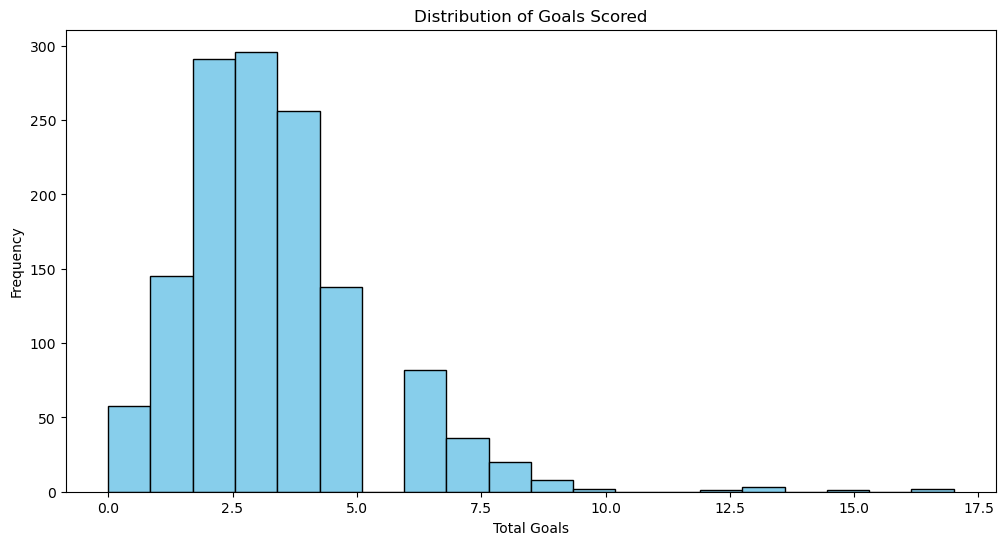

In [40]:
# Plotting a histogram of total goals scored
backup['total_goals'] = backup['home_club_goals'] + backup['away_club_goals']

plt.figure(figsize=(12, 6))
plt.hist(backup['total_goals'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Goals Scored')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.show()



Here total goals is the summation of home club goals and away club goals.

### 2)  Which team has scored the most number of total goals?

Here we have showed the top 20 home clubs based on the total goals

In [41]:
backup['home_wins'] = backup['home_club_goals'] > backup['away_club_goals']

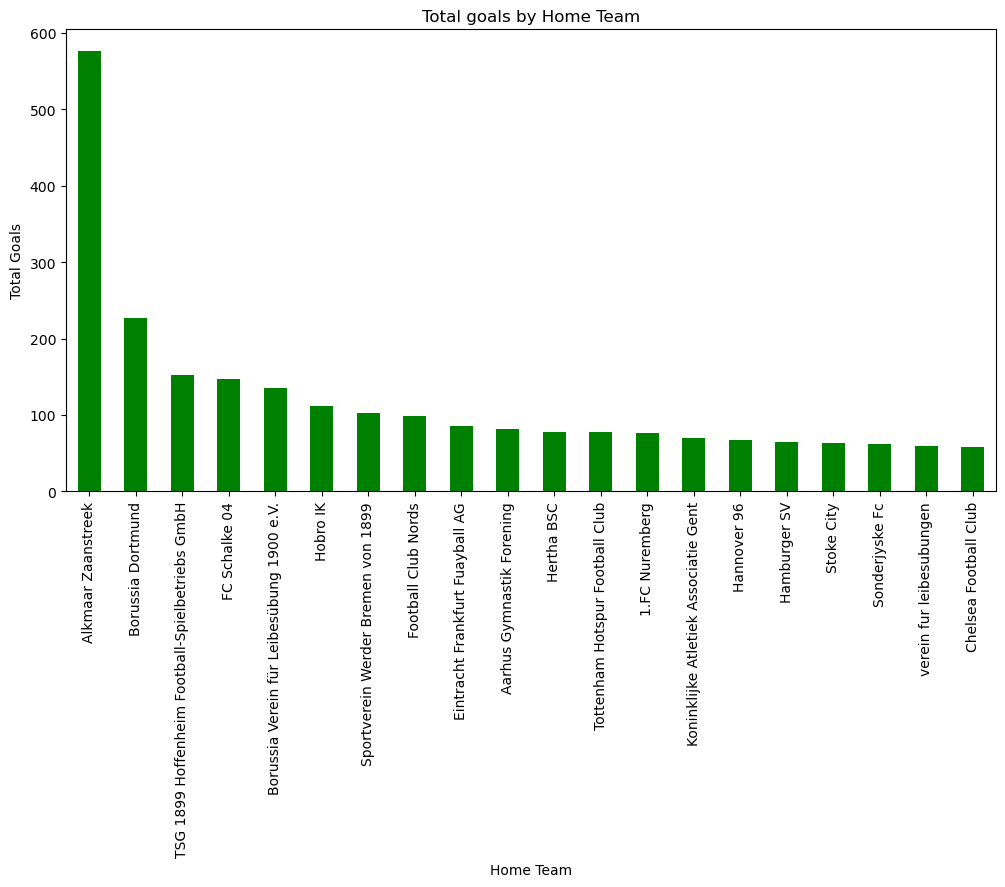

In [42]:
# Group by home team and calculate average attendance for top 20 teams
home_total_goals = backup.groupby('home_club_name')['total_goals'].sum().sort_values(ascending=False).head(20)

# Plot the results
plt.figure(figsize=(12, 6))
home_total_goals.plot(kind='bar', color='green')
plt.title('Total goals by Home Team')
plt.xlabel('Home Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)
plt.show()

In [43]:
home_total_goals

home_club_name
Alkmaar Zaanstreek                                 576
Borussia Dortmund                                  227
TSG 1899 Hoffenheim Football-Spielbetriebs GmbH    152
FC Schalke 04                                      147
Borussia Verein für Leibesübung 1900 e.V.          135
Hobro IK                                           112
Sportverein Werder Bremen von 1899                 103
Football Club Nords                                 99
Eintracht Frankfurt Fuayball AG                     85
Aarhus Gymnastik Forening                           82
Hertha BSC                                          78
Tottenham Hotspur Football Club                     78
1.FC Nuremberg                                      77
Koninklijke Atletiek Associatie Gent                70
Hannover 96                                         67
Hamburger SV                                        65
Stoke City                                          63
Sonderjyske Fc                                    

### 3) Which teams have the highest average attendance at their home matches?

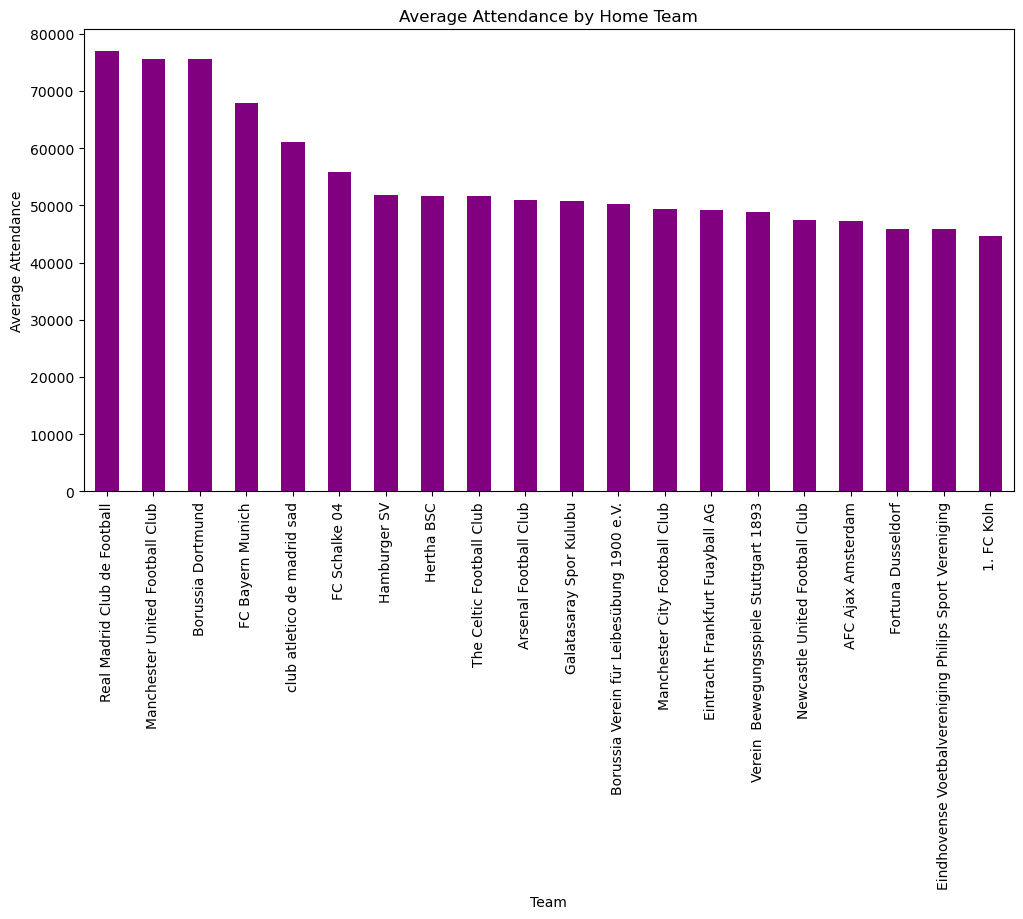

In [44]:
# Group by home team and calculate average attendance for top 20 teams
avg_attendance = backup.groupby('home_club_name')['attendance'].mean().sort_values(ascending=False).head(20)

# Plot the results
plt.figure(figsize=(12, 6))
avg_attendance.plot(kind='bar', color='purple')
plt.title('Average Attendance by Home Team')
plt.xlabel('Team')
plt.ylabel('Average Attendance')
plt.xticks(rotation=90)
plt.show()


Here the top 20 home teams with highest average attendance is presented.

In [45]:
avg_attendance

home_club_name
Real Madrid Club de Football                              76894.000000
Manchester United Football Club                           75566.000000
Borussia Dortmund                                         75491.950925
FC Bayern Munich                                          67818.824414
club atletico de madrid sad                               61023.000000
FC Schalke 04                                             55908.142867
Hamburger SV                                              51781.291667
Hertha BSC                                                51703.333333
The Celtic Football Club                                  51561.666667
Arsenal Football Club                                     50983.027232
Galatasaray Spor Kulubu                                   50734.000000
Borussia Verein für Leibesübung 1900 e.V.                 50156.704545
Manchester City Football Club                             49364.833333
Eintracht Frankfurt Fuayball AG                           4920

### Now for the hypothesis 

### 4) Does the home team have a significantly higher number of goals scored than the away team?

Null hypothesis (H0): The number of goals scored by the home team is equal to the number of goals scored by the away team.   
Alternative hypothesis (H1): The number of goals scored by the home team is significantly higher than the away team.

In [46]:
import numpy as np
from scipy.stats import t

# Randomly sample 25 games from the dataset (replace 'new_df' with your actual DataFrame)
sample = df[['home_club_goals', 'away_club_goals']].dropna().sample(25, random_state=42)

# Calculate the difference between home and away goals
diff_goals = np.array(sample['home_club_goals']) - np.array(sample['away_club_goals'])

# Mean and standard deviation of the differences
x_mean = np.mean(diff_goals)
sam_std = np.std(diff_goals)
n = len(diff_goals)
deg_f = n - 1  # degrees of freedom

# Population mean (for one-sample t-test, we assume the population mean is 0 for no difference)
mu = 0

# Significance level
alpha = 0.05

# Critical value (two-tailed test)
t_crit = t.ppf(1 - alpha, deg_f)

# T-statistic
t_stat = x_mean / (sam_std / np.sqrt(n))

# P-value
p_val = 2 * t.sf(abs(t_stat), deg_f)

# Output
print("T-statistic:", t_stat)
print("Critical t-value:", t_crit)
print("P-value:", p_val)

# Hypothesis testing
if t_stat > t_crit and p_val < alpha:
    print("Reject Null Hypothesis: The home team scores significantly more goals.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in goals.")


T-statistic: 3.4412360080584263
Critical t-value: 1.7108820799094275
P-value: 0.0021300548492103697
Reject Null Hypothesis: The home team scores significantly more goals.


Since both the t-statistic exceeds the critical value and the p-value is smaller than the significance level, we reject the null hypothesis.

Conclusion: The average number of goals scored by home teams is significantly higher than the away team.

### 5) Does the average number of goals scored by home teams differ significantly from the population mean?

Null Hypothesis (H0): The average number of goals scored by home teams is equal to the population mean (μ).  
Alternative Hypothesis (H1): The average number of goals scored by home teams is not equal to the population mean (μ).

In [47]:
# Population mean (μ)
mu_home_goals = 1.5 

# Randomly sample 25 
home_goals = np.random.choice(df['home_club_goals'], size=25, replace=False)

# Sample statistics
x_mean_home = np.mean(home_goals)
sam_std_home = np.std(home_goals)
n_home = len(home_goals)
df_home = n_home - 1

# Critical t value for two-tailed test at 5% significance level
alpha = 0.05
t_crit_home = t.ppf(1 - alpha/2, df_home)

# t-statistic calculation
t_stat_home = (x_mean_home - mu_home_goals) / (sam_std_home / np.sqrt(n_home))

# p-value for the test
p_val_home = 2 * t.sf(np.abs(t_stat_home), df_home)

# Results
print(f"Sample Mean (Home Goals): {x_mean_home}")
print(f"Sample Standard Deviation (Home Goals): {sam_std_home}")
print(f"T-statistic: {t_stat_home}")
print(f"T-critical: {t_crit_home}")
print(f"P-value: {p_val_home}")

# Conclusion
if np.abs(t_stat_home) > t_crit_home or p_val_home < alpha:
    print("Reject Null hypothesis: The average number of goals scored by home teams is significantly different from the population mean.")
else:
    print("Accept Null hypothesis: The average number of goals scored by home teams is not significantly different from the population mean.")



Sample Mean (Home Goals): 1.64
Sample Standard Deviation (Home Goals): 1.52
T-statistic: 0.4605263157894734
T-critical: 2.0638985616280205
P-value: 0.6492841338595294
Accept Null hypothesis: The average number of goals scored by home teams is not significantly different from the population mean.


In this case, since the p-value is greater than the significance level (alpha = 0.05) and the t-statistic is not greater than the critical t-value, we fail to reject the null hypothesis.

Conclusion: There is no significant difference between the average number of goals scored by home teams and the population mean. This indicates that the home team's goal-scoring performance is statistically similar to the assumed population average for this dataset.


# SPRINT 7

### ATTENDANCE AND STADIUM ANALYSIS

### 1) Can we classify the type of stadium based on the attendance?

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Loading the dataset
# Assuming the dataset is already loaded as 'df'

# Classify stadium type (Large or Small based on attendance)
backup['stadium_type'] = backup['attendance'].apply(lambda x: 'Large' if x > backup['attendance'].median() else 'Small')

# Features and target
X = df[['attendance']]  # Feature: Attendance
y = backup['stadium_type']  # Target: Stadium size (Large/Small)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9850746268656716


The model is highly accurate at classifying stadiums as "Large" or "Small" based on attendance.   
A high accuracy of 98.5% suggests that attendance is an excellent predictor of stadium type. This makes sense since the stadium's classification ("Large" or "Small") is inherently tied to the attendance capacity.

### 2) Can we classify a game as a "Big Game" (with significant attendance) based on competition type and home team performance?

In [49]:
# Classify game type (Big Game if attendance > average attendance)
backup['game_type'] = df['attendance'].apply(lambda x: 'Big Game' if x > df['attendance'].mean() else 'Normal Game')

# Features and target
X = df[['competition_type', 'home_club_goals']]  # Features: Competition type and home team goals
y = backup['game_type']  # Target: Game type

# Encode categorical variables (competition_type)
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6044776119402985


The model achieves moderate accuracy, indicating that competition type and home team performance are only somewhat predictive of a "Big Game".   
A 60.4% accuracy suggests that there are likely other factors (e.g., rivalry, match importance, star players, weather) influencing whether a game is classified as "Big Game" or "Normal Game".

# SPRINT 9

### EVENT ANALYSIS

### 1) Do goals occur more frequently in the second half of the game than in the first half?

In [50]:
# Randomly sample 25 games with goals data
sample = backup[['minute', 'type_x']].sample(25, random_state=42)

# Filter goals for the first half and second half
first_half_goals = np.array(sample[(sample['minute'] <= 45) & (sample['type_x'] == 'Goals')]['minute'])
second_half_goals = np.array(sample[(sample['minute'] > 45) & (sample['type_x'] == 'Goals')]['minute'])

# Calculate the means and standard deviations
x1_mean = np.mean(first_half_goals)
x2_mean = np.mean(second_half_goals)
s1 = np.std(first_half_goals)
s2 = np.std(second_half_goals)

n1 = len(first_half_goals)
n2 = len(second_half_goals)
deg_f = n1 + n2 - 2  # degrees of freedom

# Difference of means
mean_diff = x2_mean - x1_mean

# Combined standard deviation
std_error = np.sqrt((s1**2 / n1) + (s2**2 / n2))

# Population mean (assuming no difference)
mu = 0

# T-statistic
t_stat = mean_diff / std_error

# Critical t-value and p-value
alpha = 0.05
t_crit = t.ppf(1 - alpha, deg_f)
p_val = 2 * t.sf(abs(t_stat), deg_f)

# Output
print("T-statistic:", t_stat)
print("Critical t-value:", t_crit)
print("P-value:", p_val)

# Hypothesis testing
if t_stat > t_crit and p_val < alpha:
    print("Reject Null Hypothesis: Goals occur significantly more in the second half.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in goal frequency.")


T-statistic: 3.609791657866768
Critical t-value: 2.3533634348018264
P-value: 0.03650900594471104
Reject Null Hypothesis: Goals occur significantly more in the second half.


There is strong statistical evidence to suggest that goals occur significantly more often in the second half of the game than in the first half.

### 2) Do events (e.g., goals, yellow cards, red cards) occur significantly more in certain competition types?

In [51]:
# Randomly sample 25 games with event data
sample = backup[['competition_type', 'type_x', 'game_event_id']].sample(25, random_state=42)

# Count events for Domestic League and Cup
domestic_events = np.array(sample[sample['competition_type'] == 'domestic_league']['type_x'].value_counts())
cup_events = np.array(sample[sample['competition_type'] == 'domestic_cup']['type_x'].value_counts())

# Calculate the mean and standard deviation
x_mean = np.mean(domestic_events - cup_events)
sam_std = np.std(domestic_events - cup_events)
n = len(domestic_events)
deg_f = n - 1  # degrees of freedom

# Population mean (assuming no difference)
mu = 0

# T-statistic
t_stat = x_mean / (sam_std / np.sqrt(n))

# Critical t-value and p-value
alpha = 0.05
t_crit = t.ppf(1 - alpha, deg_f)
p_val = 2 * t.sf(abs(t_stat), deg_f)

# Output
print("T-statistic:", t_stat)
print("Critical t-value:", t_crit)
print("P-value:", p_val)

# Hypothesis testing
if t_stat > t_crit and p_val < alpha:
    print("Reject Null Hypothesis: Events occur more frequently in one competition type.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in event frequency.")


T-statistic: 1.5073783032511863
Critical t-value: 2.919985580355516
P-value: 0.2707154494446832
Fail to Reject Null Hypothesis: No significant difference in event frequency.


There is insufficient statistical evidence to conclude that events (such as goals, yellow cards, or red cards) occur more frequently in one competition type (e.g., Domestic League vs. Cup). 

# SPRINT 10

### PLAYER ATTRIBUTES AND DEMOGRAPHICS

In [52]:
# Identify datetime columns
datetime_cols = new_df.select_dtypes(exclude=['int64','float64','int32']).columns

# Drop datetime columns
new_df = new_df.drop(columns=datetime_cols)

print("Updated DataFrame without datetime columns:")
new_df.head()

Updated DataFrame without datetime columns:


,game_id,competition_id_x,season,round,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,...,player_name_x,competition_id_y,yellow_cards,red_cards,goals,assists,minutes_played,home_win,goals_assists,age
0,-1.118581,-1.083325,-1.150955,-1.427017,2.696849,-0.330108,-1.772746,0.484787,0.132737,-1.243043,...,-0.481516,-1.083325,-0.518622,-0.061222,0.857406,-0.319038,0.753095,1,0,36
1,-1.116624,0.289510,-1.150955,0.517703,0.086272,-1.085687,1.084727,-0.985298,0.919330,0.413989,...,-1.002778,0.289510,-0.518622,-0.061222,-0.625884,-0.319038,0.753095,1,0,36
2,-1.116624,0.289510,-1.150955,0.517703,0.086272,-1.085687,1.084727,-0.985298,0.919330,0.413989,...,-0.116632,0.289510,1.803903,-0.061222,-0.625884,-0.319038,0.753095,1,0,36
3,-1.100710,0.632719,-1.150955,-1.250224,-0.566372,-0.330108,1.304532,-1.825346,-1.012449,-0.158224,...,1.812039,0.632719,1.803903,-0.061222,-0.625884,-0.319038,0.753095,0,0,34
4,-1.100607,0.632719,-1.150955,-0.955570,-0.566372,-0.330108,0.645116,0.904812,1.613383,-1.052306,...,1.812039,0.632719,1.803903,-0.061222,-0.625884,-0.319038,0.753095,0,0,34


### Now to find the optimal number of clustering

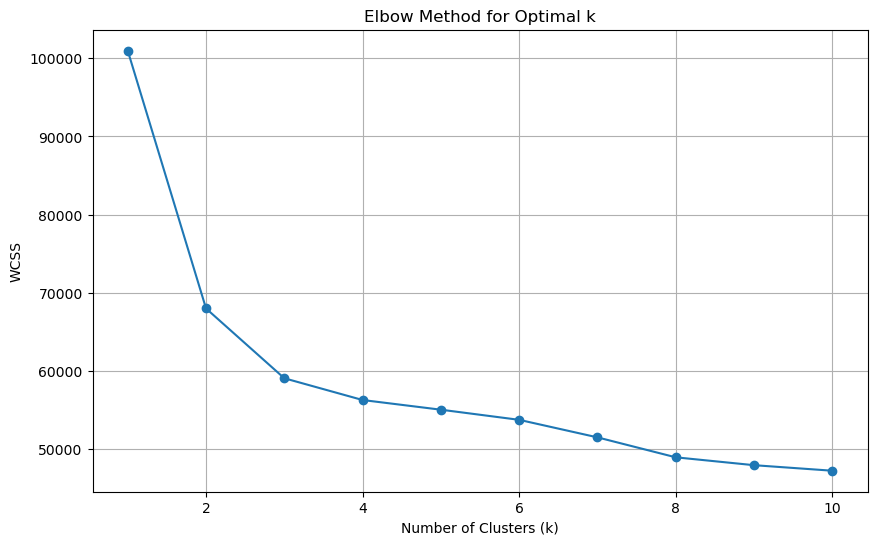

In [53]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
X = new_df 

# Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

#### 1) Can we group players based on their physical attributes (height and market value)?

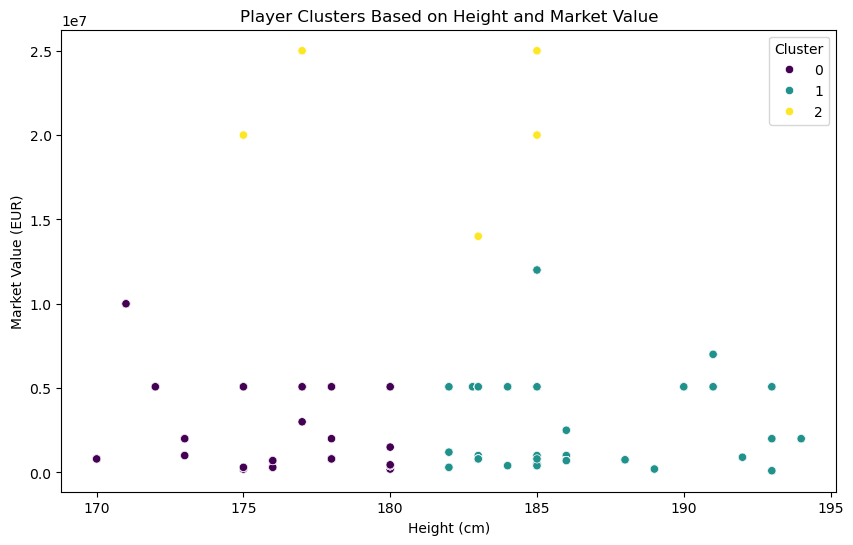

In [54]:
from sklearn.preprocessing import StandardScaler

# Select relevant columns for clustering
attributes = df[['height_in_cm', 'market_value_in_eur']].dropna()

# Normalize the data
scaler = StandardScaler()
scaled_attributes = scaler.fit_transform(attributes)

# Apply K-Means clustering
kmeans = KMeans(n_clusters = 3, random_state=42)
attributes['cluster'] = kmeans.fit_predict(scaled_attributes)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=attributes, x='height_in_cm', y='market_value_in_eur', hue='cluster', palette='viridis')
plt.title("Player Clusters Based on Height and Market Value")
plt.xlabel("Height (cm)")
plt.ylabel("Market Value (EUR)")
plt.legend(title='Cluster')
plt.show()

Clusters represent:  
High-value average height players.  
short players with moderate market value.  
Low-value taller players.  


### 2)  Can we group players based on their performance metrics (goals, assists, and minutes played)?

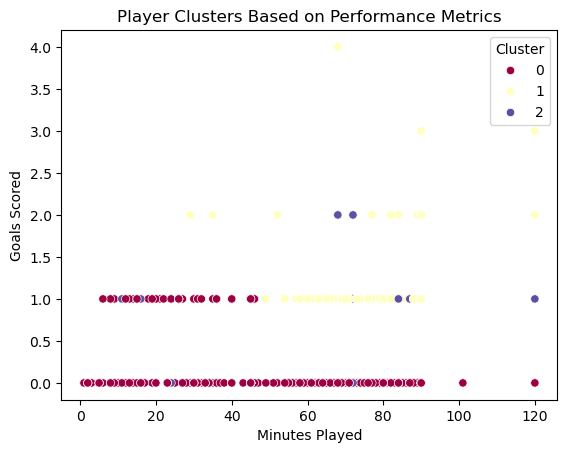

In [55]:
# Select relevant columns
performance = df[['goals', 'assists', 'minutes_played']].dropna()

# Normalize the data
scaled_performance = scaler.fit_transform(performance)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
performance['cluster'] = kmeans.fit_predict(scaled_performance)

# Visualize the clusters
sns.scatterplot(data=performance, x='minutes_played', y='goals', hue='cluster', palette='Spectral')
plt.title("Player Clusters Based on Performance Metrics")
plt.xlabel("Minutes Played")
plt.ylabel("Goals Scored")
plt.legend(title='Cluster')
plt.show()



The clusters are:  
High-performing players with significant goals and assists.  
Average performers with moderate minutes played.  
Low-performing players with limited goals and minutes.  
